In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv


In [9]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv')

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [20]:
cols = ['Geography_Germany', 'Geography_Spain', 'Gender_Male']
df[cols] = df[cols].astype(int)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1) 

In [23]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [24]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [25]:
X_train.shape

(8000, 11)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [28]:
X_test_scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [29]:
import tensorflow
from tensorflow import keras  #Two types of models sequential and non-sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()

model.add(Dense(3,activation='sigmoid', input_dim=11)) #input layer
model.add(Dense(1, activation='sigmoid')) #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [33]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10


I0000 00:00:1772115847.888391     317 service.cc:152] XLA service 0x7a9880007460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1772115847.888429     317 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1772115848.113615     317 cuda_dnn.cc:529] Loaded cuDNN version 91002


 87/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7264

I0000 00:00:1772115848.599173     317 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6940
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5581
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5013
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4762
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4650
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4537
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4509
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4440
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4420
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4291


In [35]:
model.layers[0].get_weights()  #weights of Layer 1 -> learned (11), and bias(3)

[array([[-0.11605202, -0.29034817,  0.09563082],
        [ 1.9564487 ,  0.3928706 , -1.1074936 ],
        [ 0.12375505, -0.19384858,  0.10176251],
        [ 0.25770482, -0.17905621, -0.40998974],
        [-0.27802476, -0.13391043, -0.0669056 ],
        [ 0.33995196, -0.21884307,  0.15120687],
        [-0.61469936, -0.505199  ,  0.82317257],
        [-0.16206396, -0.3554747 , -0.14597394],
        [ 0.3326547 ,  0.23478538, -0.7226919 ],
        [ 0.22800398, -0.4126636 , -0.12062024],
        [-0.21920376, -0.48922244,  0.522965  ]], dtype=float32),
 array([-0.5347717 , -0.41409245,  0.7196969 ], dtype=float32)]

In [36]:
model.layers[1].get_weights()  #weights of Layer 2 -> learned (3), and bias(2)

[array([[ 0.60884327],
        [ 0.19725166],
        [-1.8750865 ]], dtype=float32),
 array([-0.6508183], dtype=float32)]

In [40]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.1208526 ],
       [0.1469273 ],
       [0.13950373],
       ...,
       [0.08497961],
       [0.17319448],
       [0.34101152]], dtype=float32)

In [45]:
y_pred = np.where(y_log > 0.5, 1,0) # decide threshold
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.803

Change internal parameters and check is accuray is increses

In [47]:
model = Sequential()

model.add(Dense(11,activation='relu', input_dim=11)) #input layer
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [57]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2) #validation split test 20% data(1600) and train(6400) -> within train data(8000) and 

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8662 - loss: 0.3172 - val_accuracy: 0.8556 - val_loss: 0.3474
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.3105 - val_accuracy: 0.8531 - val_loss: 0.3462
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8721 - loss: 0.3064 - val_accuracy: 0.8600 - val_loss: 0.3438
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8714 - loss: 0.3125 - val_accuracy: 0.8544 - val_loss: 0.3448
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8740 - loss: 0.3074 - val_accuracy: 0.8537 - val_loss: 0.3452
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8696 - loss: 0.3122 - val_accuracy: 0.8531 - val_loss: 0.3451
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8676 - loss: 0.3162 - val_accuracy: 0.8550 - val_loss: 0.3486
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8763 - loss: 0.3032 - val_accu

In [60]:
history.history

{'accuracy': [0.8685937523841858,
  0.8659374713897705,
  0.8682812452316284,
  0.8689062595367432,
  0.8696874976158142,
  0.8681250214576721,
  0.8685937523841858,
  0.8695312738418579,
  0.867968738079071,
  0.8681250214576721,
  0.8704687356948853,
  0.8690624833106995,
  0.8701562285423279,
  0.8690624833106995,
  0.870312511920929,
  0.8682812452316284,
  0.8700000047683716,
  0.8698437213897705,
  0.8671875,
  0.8696874976158142,
  0.8709375262260437,
  0.8693749904632568,
  0.8681250214576721,
  0.8687499761581421,
  0.8676562309265137,
  0.8676562309265137,
  0.8675000071525574,
  0.8682812452316284,
  0.8682812452316284,
  0.8696874976158142,
  0.8692187666893005,
  0.8682812452316284,
  0.8695312738418579,
  0.8696874976158142,
  0.8700000047683716,
  0.8690624833106995,
  0.8706250190734863,
  0.8678125143051147,
  0.8692187666893005,
  0.8687499761581421,
  0.8693749904632568,
  0.8704687356948853,
  0.8701562285423279,
  0.8696874976158142,
  0.8689062595367432,
  0.87000

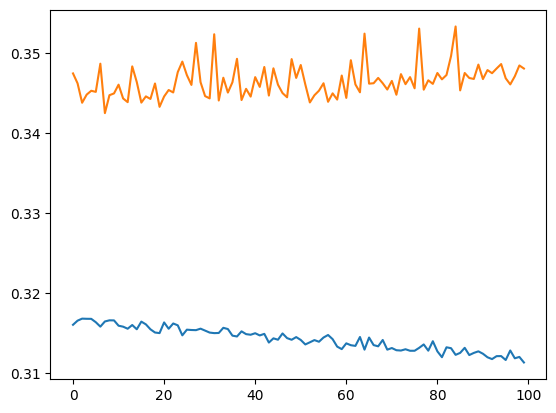

In [62]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

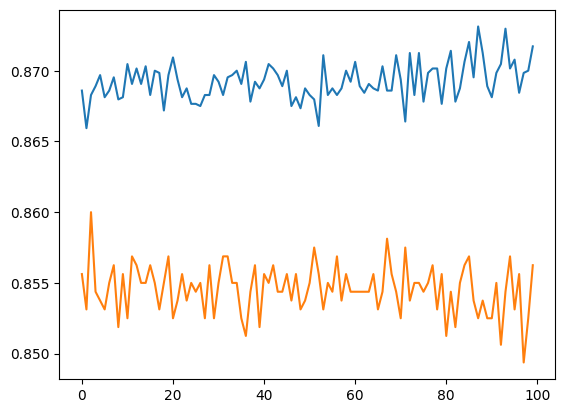

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [53]:
model.layers[1].get_weights()

[array([[ 0.5390603 ,  0.5535658 ,  0.36350584,  0.39968565, -0.3013424 ,
         -0.47369733, -0.780361  ,  0.3960277 ,  0.4063537 ,  0.8046126 ,
         -0.37476617],
        [ 0.21416722, -0.4475536 , -0.28385293,  0.1999944 , -0.21577783,
          0.24427894,  0.8194114 , -0.22415562,  0.6107464 , -0.53806394,
          0.56765366],
        [-0.6251902 , -0.20245601, -0.10365745,  0.02240361,  0.00481992,
          0.03380099,  0.21472201, -0.00384205, -1.5748898 ,  0.15058072,
         -0.46651927],
        [ 0.3741967 ,  0.03119449,  0.69070274,  0.30439636,  0.55601   ,
          0.36675093, -0.21751869, -0.46115   , -0.47646913,  0.6925926 ,
          0.37168813],
        [-0.2747558 ,  0.07262179,  0.7165418 ,  0.50747836,  0.22258128,
         -0.0467714 , -0.14120802,  0.8105648 ,  0.04889898,  0.5377666 ,
         -0.17090575],
        [-0.21351817, -0.75632507,  0.6350935 , -0.08775473, -0.46271276,
          0.29994124, -0.99842924,  0.78503126, -0.34077847,  0.6456447

In [54]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [55]:
y_pred = np.where(y_log>0.5,1,0)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862